In [50]:
import numpy as np
from tinygrad import Tensor, Device
from extra.datasets import fetch_cifar
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid

In [30]:
x, _, _, _ = fetch_cifar()
x = x.to(device=Device.DEFAULT)

In [31]:
print(x.shape)

(50000, 3072)


In [113]:
def plot_images(x):
  x = x.reshape(-1, 3, 32, 32)
  fig = plt.figure(figsize=(5, 5))
  grid = ImageGrid(fig, 111,
    nrows_ncols=(2, 5),
    axes_pad=0.1,
  )
  for ax, im in zip(grid, x):
    ax.imshow(im.permute(1, 2, 0).numpy())


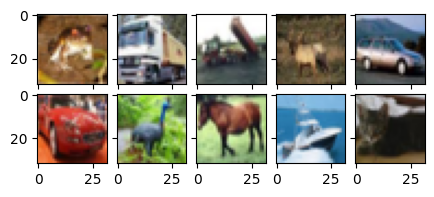

In [114]:
plot_images(x[:10])

In [119]:
def pca(x: Tensor):
  x = x - x.mean(axis=0) # zero center the data
  cov = Tensor.dot(x.T, x) / x.shape[0] # get the data covariance matrix
  u, _, _ = np.linalg.svd(cov.numpy())
  xrot_reduced = Tensor.dot(x, Tensor(u[:,:100]))
  # rotate back to pixels to visualize
  xrot_reduced_pix = xrot_reduced.dot(Tensor(u.T[:100,:]))
  return xrot_reduced_pix

def whiten(x):
  x = x - x.mean(axis=0) # zero center the data
  cov = x.T.dot(x) / x.shape[0] # get the data covariance matrix
  u, s, _ = np.linalg.svd(cov.numpy())
  xrot = x.dot(Tensor(u)) # decorrelate the data
  # divide by the eigenvalues (which are square roots of the singular values)
  xwhite = xrot / Tensor(np.sqrt(s + 1e-5))
  xwhite_pix = xwhite.dot(Tensor(u.T[:100,:]))
  return xwhite_pix

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

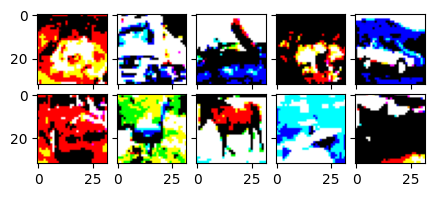

In [120]:
reduced = pca(x[:10])
plot_images(reduced)

In [ ]:
whitened = whiten(x[:10])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

(10, 3072)
[ 2.6241122e+02  1.4779387e+02 -6.5445053e+01 ... -1.6445711e-02
  1.6782348e+00 -1.3640411e+00]


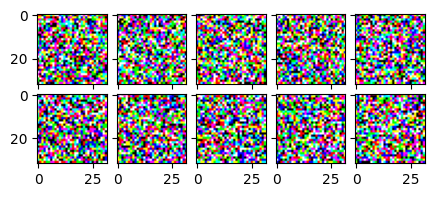

In [116]:
print(whitened.shape)
print(whitened.numpy()[0])
plot_images(whitened*255)
